# Evaluating and Optimizing Machine Learning Techniques for Automatic Nuclei Detection

<b>1. Motivation</b>

Many people die from cancer every year. This is terribly sad. :’( We would like to prevent this. One option is to identify the cancer early; treatment of nascent cancers tends to be more successful. Often, cells suffering from cancer display different biomarkers in their nuclei. These biomarkers can be seen in immunohistochemical (IHC) imaging. If there were a rapid and accurate way to screen images for cancerous cells, many cancer prognoses could be improved. We aim to develop an automated cell nuclei detection technique.

<b>2. Challenges</b>

Imaging conditions can vary tremendously - illumination, contrast, fluorescence and staining will all affect the appearance of the cell. We would also like our technique to be generalizable to many cell types because cancer is insidious and affects many cell types. Depending on the biological sample that was imaged, cells may also be aggregated; where a trained eye could distinguish individual nuclei, an algorithm might falter. 

<b>3. Pre-treatment and Initial Segmentation (“Detection”)</b>

Colour is usually either normalized or thresholded to remove noise and background [1]. A variety of pre-processing techniques can be used to find objects, from conventional blob detection, to morphological and/or contour resolution, to watershed segmentation [2-4]. We will use sensible discretion to pick a pre-treatment technique.

<b>4. Segmentation and Identification</b>

There are two primary approaches to cell segmentation:

<b><i>Traditional methods segment nuclei from single or overlapping cells</i></b>

Several traditional methods, often involving a-priori knowledge of cell shape and size [5]. First, cell clusters are segmented from the background by concavity [6-7]. Next, cell clusters can be separated into individual cells based on the concavity of the intensity distribution [7]. After individual cells have been identified, cell boundaries are often approximated using elliptical curve-fitting techniques [5,7]. Further segmentation can be applied to separate the cell nucleus from the cytoplasm. A gradient vector flow active contour model (GVF-ACM) has been shown to find boundaries between the nucleus and cytoplasm [8].

In this work, we can begin performing segmentation using the scikit-image package for python. This package includes methods for ellipse and boundary fitting, as well as edge detection and active contour modeling.

<b><i>Machine learning methods identify nuclei via classification algorithms</i></b>

Machine learning and pattern recognition have been successfully used to identify and segment cells in IHC images [9]. Whether using techniques such as cluster analysis [10], random forests [9], or deep neural networks [11-13], the workflow is similar. First, initial segmentation is performed (often in the pre-treatment step) to find cells and agglomerates. Then, training data is fed through a classifier to extract the most important features. Repeating this process while keeping only the most important feature vectors establishes a model, which is finally used to classify new test data.

We will start with cluster analysis and random forest classifiers (from the scikit-learn package), but likely will also employ traditional GVF or ellipse-fitting algorithms (which we will implement in python) to refine initial segmentation. If necessary, we also intend to look into convolutional neural networks implemented with the TensorFlow package.

### References

[1] M. Veta, P.J. Van Diest, R. Kornegoor, A. Huisman, M.A. Viergever, and J.P.W. Pluim. (<b>2013</b>) Automatic Nuclei Segmentation in H&E Stained Breast Cancer Histopathology Images. <i>PLoS One</i>, 8, 7.

[2] X. Yang, H. Li, and X. Zhou. (<b>2006</b>) Nuclei Segmentation using Marker-Controlled Watershed, Tracking using Mean-Shift, and Kalman Filter in Time-Lapse Microscopy. <i>IEEE Trans. Circuits Syst. I, Reg. Papers.</i>, 53, 11.

[3] J. Cheng and J.C. Rajapakse. (<b>2009</b>) Segmentation of Clustered Nuclei with Shape Markers and Marking Function. <i>IEEE Trans. Biomed. Eng.</i>, 56, 3.

[4] S. Ali and A. Madabhushi, “An Integrated Region-, Boundary-, Shape-Based Active Contour for Multiple Object Overlap Resolution in Histological Imagery. <i>IEEE Trans. Med. Imag.</i>, 31, 7.

[5] S. Kothari, Q. Chaudry, M.D. Wang. (2009) Automated Cell Counting and Cluster Segmentation Using Concavity Detection and Ellipse Fitting Techniques. <i>Proc. IEEE Int. Symp. Biomed. Imaging</i>, 795.

[6] Y. Toyoshima, T. Tokunaga, O. Hirose, M. Kanamori, T. Teramoto, M.S. Jang, S. Kuge, T. 
Ishihara, R. Yoshida, and Y. Iino. (<b>2006</b>) Accurate Automatic Detection of Densely Distributed Cell Nuclei in 3D Space. <i>PLoS. Comput. Biol.</i>, 12, 6.

[7] H.S. Wu, J. Gil, and J.Barba. (<b>1998</b>) Optimal Segmentation of Cell Images. <i>IEE P-Vis. Image. Sign.</i>, 145, 1.

[8] S.F. Yang-Mao, Y.K. Chan, and Y.P. Chu. (<b>2008</b>) Edge enhancement nucleus and cytoplast contour detector of cervical smear images. <i>IEEE Trans. Syst. Man, Cybern. B</i>, 38, 2.

[9] O. Rujuta and A.J. Vyavahare. (<b>2017</b>) Review of Nuclei Detection, Segmentation in Microscopic Images. <i>J. Bioengineer. Biomed. Sci.</i>, 7, 2.

[10] S. Wienert, D. Heim, K. Saeger, A. Stenzinger, M. Beil, P. Hufnagl, M. Dietel, C. Denkert, F. Klauschen. (<b>2012</b>) Detection and Segmentation of Cell Nuclei in Virtual Microscopy Images: A Minimum-Model Approach. <i>Sci. Rep.</i>, 2, 503.

[11] S.K. Sadanandan, P. Ranefall, S. Le Guyader, and C. Wahlby. (<b>2017</b>) Automated Training of Deep Convolutional Neural Networks for Cell Segmentation. <i>Sci. Rep.</i>, 7, 1.

[12] K. Sirinukunwattana, S.E.A. Raza, Y.W Tsang, I.A. Cree, D.R.J. Snead, and N.M. Rajpoo. (<b>2016</b>) Locality Sensitive Deep Learning for Detection and Classification of Nuclei in Routine Colon Cancer Histology Images. <i>IEEE Trans. Med. Imag.</i>, 35, 99.

[13] N. Kumar, R. Verma, S. Sharma, S. Bhargava, A. Vahadane, and A. Sethi. (<b>2017</b>) A Dataset and a Technique for Generalized Nuclear Segmentation for Computational Pathology. <i>IEEE Trans. Med. Imag.</i>, 36, 7.

In [75]:
## change the following to where you have stored and/or extracted the files
path = './project/'
#path = '/Users/arrakis/Dropbox/Tool - Classes/ChBE 8803/Project'

n_samples = 3
#n_samples = 560 # 560 samples to train on

###################################################################

# Packages Used
* numpy version 1.13.3
* pandas version 0.20.3
* matplotlib version 1.11.0
* sklearn version 0.19.1
* skimage version 0.13.0
* cv2 (used for image processing)
    * See lines 1-3 in the next block for installation on mac (version 3.2.0.6) - uncomment and run if necessary
    * For PC, installation worked with pip install opencv-python from the anaconda prompt (version 3.4.0)


In [100]:
#import sys
#!{sys.executable} -m pip install opencv-python==3.2.0.6 # for mac
# >> https://stackoverflow.com/questions/47963386/image-not-found-error-after-installing-opencv-python-wheel-on-mac

## load all packages used below
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import zipfile, io
import numpy as np
import pandas as pd
import pylab as plt
import sklearn, cv2
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import feature
from skimage.filters import sobel
from skimage.morphology import watershed
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
help(skimage)

Help on package skimage:

NAME
    skimage - Image Processing SciKit (Toolbox for SciPy)

DESCRIPTION
    ``scikit-image`` (a.k.a. ``skimage``) is a collection of algorithms for image
    processing and computer vision.
    
    The main package of ``skimage`` only provides a few utilities for converting
    between image data types; for most features, you need to import one of the
    following subpackages:
    
    Subpackages
    -----------
    color
        Color space conversion.
    data
        Test images and example data.
    draw
        Drawing primitives (lines, text, etc.) that operate on NumPy arrays.
    exposure
        Image intensity adjustment, e.g., histogram equalization, etc.
    feature
        Feature detection and extraction, e.g., texture analysis corners, etc.
    filters
        Sharpening, edge finding, rank filters, thresholding, etc.
    graph
        Graph-theoretic operations, e.g., shortest paths.
    io
        Reading, saving, and displaying images 

# ideas for improving on workflow

* normalize/reshape images and/or bias to have fewer points being compared
* do dimensional reduction / PCA on all training set images to parse into different cell/conditions type, then threshold each one with best method for group
    - related to that, try different thresholding (Watershed, etc)
* change up the regression technique and/or training model

# Loading Images and Masks from Training Set

* The function load_zipped_img extracts an image and set of masks from the .zip file
    * The outputs are the image and a list of corresponding masks
* A working example of extracting an individual image and associated masks is shown below

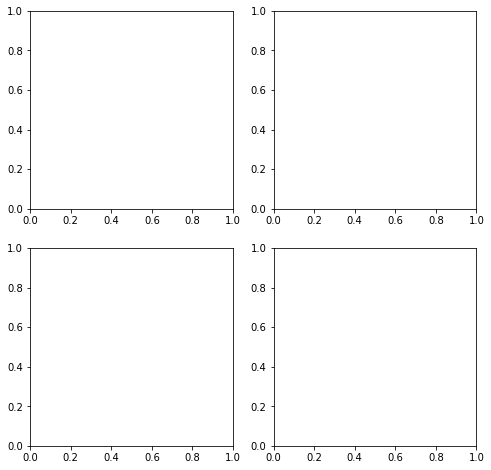

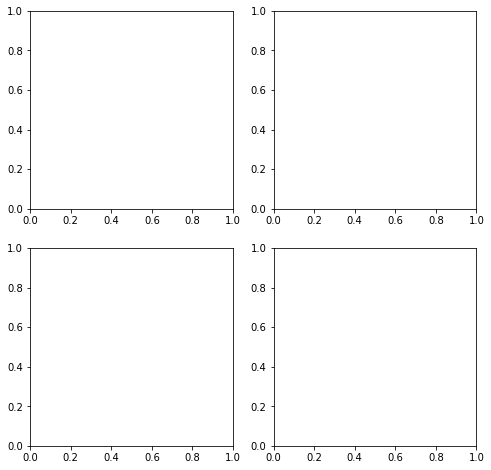

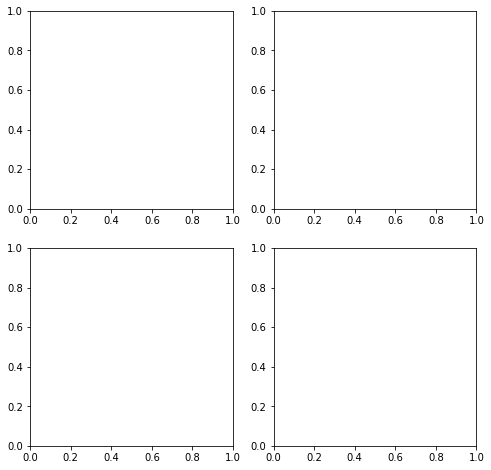

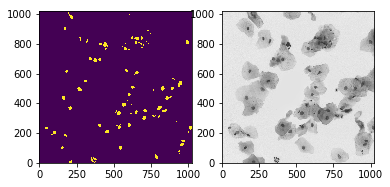

In [98]:
## STEP 1: Load an image (by index) and corresponding masks from ZIPPED stage1_train as np array

def load_zipped_img(path, img_index): # load an image and all its masks
    z = zipfile.ZipFile(path,'r') # access zip folder
    zlist = z.namelist() # list of files in zip folder
    
    #lists = zlist[0:560]
    
    
    img_name = zlist[img_index] # get selected image
    img_name = img_name[0:-1] # eliminate "/"
    
    # get image and return as np array
    img_raw = z.read('{}/images/{}.png'.format(img_name,img_name)) # get raw image
    img = io.BytesIO(img_raw) # convert image
    img = mpimg.imread(img) # numpy array
    img = np.flip(img,0) # flip image
    
    # get all masks and return as np array
    mask_list = []
    for string in zlist:
        if string.startswith(img_name+'/mask'):
            mask_list.append(string)
    mask_list = mask_list[1:-1] # list of masks
    
    masks = []
    for m in mask_list:
        mask_raw = z.read(m) # get raw mask
        mask = io.BytesIO(mask_raw) # convert mask
        mask = mpimg.imread(mask) # numpy array
        mask = np.flip(mask,0) # flip mask
        masks.append(mask)
        
    return img, masks

# WORKING EXAMPLE OF load_zipped_img

(img, masks) = load_zipped_img(path+'/stage1_train.zip',177) # The one example that the model performs poorly for

fig, ax = plt.subplots(1,2)

ax[0].imshow(sum(masks), origin='lower')
ax[1].imshow(img, origin='lower')
plt.show()


# Initial Segmentation

Before determining the positions of nuclei in an image, it is key to separate the image from the background using a process called image segmentation. Image segmentation is typically performed on grayscale images.

* The grayscale function converts images from rgb to grayscale
* The otsu function selects an optimal threshold for equal inter-/intra-class variance
* The function float2int8 converts the data type to int8, which is required for the cv2 package
* the function watershed applies watershed segmentation to a given image to determine the image and background
    * The outputs of watershed include:
    * The image guessed by watershed segmentation (img_guess)
    * The sure background (sure_bg)
    * The sure foreground/image (sure_fg)
    * The unknown region (unknown). The classification of these pixels as image or background by simple thresholding is 
      unclear
    * The reduced area (reduced_area)
* A working example of watershed segmentation is shown below

In [99]:
## STEP 2: Grayscale image and segment objects by thresholding images

# convert to grayscale
def grayscale(im):
    return rgb2gray(im)

# Otsu's Method, calculates optimal threshold for equal inter-/intra-class variance
def otsu(image_gray):
    threshold_val = threshold_otsu(image_gray) #Select threshold from Otsu's method
    img_masked = np.where(image_gray > threshold_val, 1, 0)

    if np.sum(img_masked==0) < np.sum(img_masked==1):
        img_masked = np.where(img_masked, 0, 1)
    return img_masked

# Function to convert float32 raw images to int8 single channel
def float2int8(img_float32):
##
    max_8bit = 255.0 # depends on dtype of image data
    max_16bit = 65535.0
    phi = 1
    theta = 1
  # increase intensity s.t. dark pixels become much brighter, bright pixels become slightly bright
    intensified_float32 = (max_8bit/phi)*(img_float32/(max_8bit/theta))**0.5
  # convert to int16 format for histogram equalization
    img_int16 = plt.array(intensified_float32, dtype=plt.uint16)
  # CLAHE (contrast limited adaptive histogram equalization)
  # >> https://docs.opencv.org/3.3.0/d3/dc1/tutorial_basic_linear_transform.html
    clahe = cv2.createCLAHE(clipLimit=50.0, tileGridSize=(20,20))
    img_clahe = clahe.apply(img_int16)
  # convert to int8 for threshold and watershed
    img_int8 = cv2.convertScaleAbs(img_clahe, alpha=(max_8bit/max_16bit))
    return img_int8

# Function to watershed segment images
def watershed(img_float32):
# >> http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html
# >> http://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html
##
  # convert input image (float32) to 3-channel int8
    img3 = cv2.cvtColor(img_float32, cv2.COLOR_RGB2BGR)
    ch1,ch2,ch3 = cv2.split(img3)
    ret,thresh1 = cv2.threshold(float2int8(ch1),0,255,cv2.THRESH_OTSU)
    ret,thresh2 = cv2.threshold(float2int8(ch2),0,255,cv2.THRESH_OTSU)
    ret,thresh3 = cv2.threshold(float2int8(ch3),0,255,cv2.THRESH_OTSU)
    img_guess = cv2.merge((thresh1, thresh2, thresh3))
  
  # converge input image to 1-channel int8 grayscale and threshold (Otsu)
    img_grey = grayscale(img_float32)
    int8_grey = float2int8(img_grey)
    ret, int8_thresh = cv2.threshold(int8_grey,0,255,cv2.THRESH_OTSU)
  # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(int8_thresh,cv2.MORPH_OPEN,kernel,iterations=2)
  # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    reduced_area = cv2.dilate(opening,kernel,iterations=10)
  # finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
  # finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
  # marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+1 # add one to all labels so sure background is 1 (not 0)
    markers[unknown==255] = 0 # mark unknown region as 0
  # apply watershed and mark boundary as -1
    markers = cv2.watershed(img_guess, markers)
    img_guess[markers == -1] = [255,0,0]

    return img_guess, markers, sure_bg, sure_fg, unknown, reduced_area


#### TESTING
(img, mask) = load_zipped_img(path+'/stage1_train.zip', 510)

img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
ch1,ch2,ch3 = cv2.split(img3)
ret,thresh1 = cv2.threshold(float2int8(ch1),0,255,cv2.THRESH_OTSU)
ret,thresh2 = cv2.threshold(float2int8(ch2),0,255,cv2.THRESH_OTSU)
ret,thresh3 = cv2.threshold(float2int8(ch3),0,255,cv2.THRESH_OTSU)
img_guess = cv2.merge((thresh1, thresh2, thresh3))

img_grey = grayscale(img)
int8_grey = float2int8(img_grey)
ret, int8_thresh = cv2.threshold(int8_grey,0,255,cv2.THRESH_OTSU)

#imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#reta,thresha = cv2.threshold(imgray,127,255,0)
#im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print(contours.shape)
print(hierarchy.shape)
print(im2.shape)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(int8_thresh,cv2.MORPH_OPEN,kernel,iterations=2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
reduced_area = cv2.dilate(opening,kernel,iterations=10)

# finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)

# finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1 # add one to all labels so sure background is 1 (not 0)
markers[unknown==255] = 0 # mark unknown region as 0

# apply watershed and mark boundary as -1
markers = cv2.watershed(img_guess, markers)
img_guess[markers == -1] = [255,0,0]

un=img[unknown==255]
#print(un.shape)
#print(un)

fig, ax = plt.subplots(1,3, figsize = (10,10))

ax[0].imshow(sum(mask), origin='lower')
ax[1].imshow(img, origin='lower')
ax[2].imshow(grayscale(img_guess), origin='lower')
plt.show()



AttributeError: module 'matplotlib.pyplot' has no attribute 'array'

# Separate Individual Objects

* The function separate_obj separates the objects in an image after a thresholding method has been applied
* The function convert2runlength finds the objects in an image (1 corresponds to object, 0 to backgroun) and finds runs of continuous object pixels
* The function rle generates a dataframe of images in run-length format. This is the output format required by the Kaggle competition

In [ ]:
## STEP 3: Separate individual objects and encode in run-length format

# separate objects in image into individual masks
def separate_obj(img_masked):
    labels, nlabels = ndimage.label(img_masked)

    label_arrays = []
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        label_arrays.append(label_mask)
    return labels, nlabels, label_mask

# convert path to run-length encoding (RLE) output format
def convert2runlength(x):
    obj = np.where(x.T.flatten()==1)[0] #1 corresponds to object, 0 to background
    run_lengths = []
    prev = -2
    for b in obj: # find continuous set of object pixels
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return " ".join([str(i) for i in run_lengths])

def rle(img_masked, im_id):
    (labels, nlabels, label_mask) = separate_obj(img_masked)
    im_df = pd.DataFrame()
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        if label_mask.flatten().sum() > 10:
            rle = convert2runlength(label_mask)
            s = pd.Series({'ImageId': im_id, 'EncodedPixels': rle})
            im_df = im_df.append(s, ignore_index=True)
    return im_df

# Data Shape Manipulation

* The function one_index takes an image (2d array) and converts it to a 1d array. They are indexed from top to bottom then left to right
* The function pad_normalize helps account for variation in image sizes. It determines the maximum length in a set of one-indexed images and "pads" all other one-indexed images with zeros so that all images have the same length.

In [96]:
# one-indexes a 2d array into 1d, top down then left right, output is np 1d array
def one_index(arr2d):
    h, w = arr2d.shape[0:2]
    
    arr1d = []
    for col in range(0, w):
        for row in range(0, h):
            arr1d.append(arr2d[row][col])
    return np.array(arr1d)
    
# pads all vectors in array to have max_len, returns np array
def pad_normalize(array, max_len):
    for i in range(0, len(array)):
        vec = array[i]
        if len(vec) < max_len:
            array[i] = np.concatenate(( np.array(vec).reshape(1,-1), np.zeros((1, (max_len-len(vec)))) ), axis=1)
        else:
            array[i] = np.array(vec).reshape(1,-1)
    return np.array(array)



In [97]:
#Separate the cells 

# Training a Model

* X = a vector of the one-indexed images in the training set
* Y = a vector containing the sum of the one-indexed masks for each image (The correct nuclei)
* Currently fits a Random Forest Classifier with a maximum depth of 4. The feature vector contains the following information:
    1. The grayscale pixel intensity (continuous)
    2. The watershed prediction for a pixel (discrete)
    3. The magnitude of the gradient of pixel intensity (calculated using the Sobel operator)
    4-6. The intensity for the rgb color channels respectively (continuous)


# Model Validation

* Tests the performance of the model
* Uses cross-validation for tuning of hyperparameters?
* Uses confusion matrix to quantify types of errors (fp, fn, tp, tn)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Not rigorous but I picked a few images to train on - it went pretty well

n_samples = [0, 19, 50, 100, 149, 150, 175, 177, 200, 250, 300, 350, 400, 510, 560, 650]
#n_samples = range(0,560)
x_train = np.zeros(6).reshape(1,6) # predicted segmentation using Otsu's thresholding

y_train = np.zeros(1) # "correct" segmentation from sum of masks

max_len = 0
conm = []
acc = []
for i in n_samples:
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) # loads image and associated masks
    
    print(i)
    

    
    (img_guess, markers, sure_bg, sure_fg, unknown, reduced_area) = watershed(img)

    intensity=grayscale(img)
    #img_guess = otsu(intensity)
    img_guess=grayscale(img_guess)
    #img_guess = np.dot(0,intensity)
    fil = sobel(grayscale(img))[unknown==255].reshape(-1,1)
    #fil = sobel(grayscale(img)).reshape(-1,1)
    intensity_raw = intensity[unknown==255].reshape(-1,1)
    #intensity_raw = intensity.reshape(-1,1)
    watershed_raw = img_guess[unknown==255].reshape(-1,1)
    #watershed_raw = img_guess.reshape(-1,1)
    
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ch1,ch2,ch3 = cv2.split(img3)
    #ch1 = ch1.reshape(-1,1)
    #ch2 = ch2.reshape(-1,1)
    #ch3 = ch3.reshape(-1,1)
    
    ch1 = ch1[unknown==255].reshape(-1,1)
    ch2 = ch2[unknown==255].reshape(-1,1)
    ch3 = ch3[unknown==255].reshape(-1,1)
    
    feature = np.concatenate((intensity_raw,watershed_raw, fil, ch1, ch2, ch3), axis = 1) # Features include grayscale intensity, watershed, sobel, rgb channels
    
    
    y_raw = sum(masks)
    y_raw = y_raw[unknown==255].reshape(-1,1)
    

    x_train = np.append(x_train,feature).reshape(-1,6)
    y_train = np.append(y_train,y_raw).reshape(-1,1)
    
    
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train)
# Kept a split training set around but not needed

#clf = svm.SVC(C = 1.0)
clf = RandomForestClassifier(max_depth=5, random_state=0)
%time clf.fit(Xtrain, ytrain[:,0]) #599 ms for a training set of this size!
    

    #y_pred = clf.predict(Xtest)
    #cm = confusion_matrix(ytest, y_pred)
    #print(cm)
    #conm.append(cm)
    #accuracy = sklearn.metrics.accuracy_score(ytest, y_pred)
    #print(accuracy)
    #acc.append(accuracy)
    
    #(img_guess, markers, sure_bg, sure_fg, unknown, reduced_area) = watershed(img)

    #fig, ax = plt.subplots(1,4, figsize = (10,10))

    #ax[0].imshow(sum(masks), origin='lower')
    #ax[1].imshow(grayscale(img), origin='lower')
    #ax[2].imshow(output, origin='lower')
    #ax[3].imshow(img_guess, origin='lower')
    #plt.show()

#A = np.array(acc)
#Avg_acc = np.mean(A)
#print(Avg_acc)

0
19
50
100
149
150
175
177
200
250
300
350
400
510
560
650
Wall time: 11.7 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [47]:
# Testing the classifier on the remaining images
for i in range(0,560):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i)

    (img_guess, markers, sure_bg, sure_fg, unknown, reduced_area) = watershed(img)

    intensity = grayscale(img)
    shap = intensity.shape
    intensity_raw = intensity.reshape(-1,1)
    #watershed_raw = img_guess[unknown==255].reshape(-1,1)
    watershed_raw = grayscale(img_guess).reshape(-1,1)
    fil = sobel(grayscale(img)).reshape(-1,1)

    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ch1,ch2,ch3 = cv2.split(img3)
    ch1 = ch1.reshape(-1,1)
    ch2 = ch2.reshape(-1,1)
    ch3 = ch3.reshape(-1,1)
    feature = np.concatenate((intensity_raw,watershed_raw, fil, ch1, ch2, ch3), axis = 1)

    yp = clf.predict(feature)
    y_real = sum(masks).reshape(-1,1)
    accuracy = sklearn.metrics.accuracy_score(y_real, yp)
    precision = sklearn.metrics.precision_score(y_real, yp)
    f1 = sklearn.metrics.f1_score(y_real, yp)
    print(i, accuracy, precision, f1)
    acc.append([accuracy, precision, f1])

    #output = yp.reshape(shap[0],shap[1])


0 0.976974487305 0.855543517515 0.862630860264
1 0.987716674805 0.911375947996 0.912661386568
2 0.872155761719 0.954715679511 0.787233610304
3 0.950402832031 0.881252750477 0.855373224647
4 0.973583984375 0.932872149628 0.770908320982
5 0.989227294922 0.839439976169 0.888678650268
6 0.922256469727 0.939595680766 0.819588541482
7 0.944074074074 0.986525353611 0.873565223459
8 0.977401733398 0.258007117438 0.163749294184
9 0.939737654321 0.978683865326 0.873065921207
10 0.916913580247 0.911298030969 0.815736335946
11 0.84880292618 0.610229159748 0.573918475715
12 0.956161499023 0.82166758523 0.879006106549
13 0.986373901367 0.878065996118 0.91765790687
14 0.912021604938 0.954737502615 0.800133221147
15 0.958892822266 0.342325581395 0.214577259475
16 0.983306884766 0.900203665988 0.86602987999
17 0.930925925926 0.996173172274 0.869929094502
18 0.988906860352 0.574128765505 0.727817296893
19 0.992874145508 0.293838862559 0.209813874788
20 0.990753173828 0.593833780161 0.745164003364
21 0.8

172 0.966201782227 0.765171386654 0.756577356749
173 0.987045288086 0.713089005236 0.827963525836
174 0.979431152344 0.900521797677 0.888114209827
175 0.900134277344 0.625027833445 0.578494512855
176 0.928088378906 0.895290195743 0.780505980104
177 0.989502906799 0.846347988491 0.75287936957
178 0.988510131836 0.697750702905 0.798177432324
179 0.919922839506 0.978722572066 0.828247054151
180 0.957838748895 0.891626144165 0.765725515484
181 0.933996582031 0.752001407583 0.759720926099
182 0.93217285588 0.925597702567 0.810615645734
183 0.910264699381 0.848322328527 0.659680816506
184 0.958419799805 0.868904741922 0.883701079766
185 0.958602905273 0.899018232819 0.868689802042
186 0.89453125 0.964771469239 0.849587409909
187 0.899836980548 0.99550132626 0.721311223352
188 0.989179929266 0.716512290702 0.804258722383
189 0.909490740741 0.902960815322 0.778009084027
190 0.856665039063 0.723191890983 0.826501965188
191 0.987289428711 0.604422604423 0.747039174005
192 0.992416381836 0.884529

341 0.965006078691 0.873812147087 0.800309036154
342 0.934411621094 0.878185005504 0.667172546226
343 0.990097045898 0.775637939336 0.832343063808
344 0.948803710938 0.977558163475 0.693644996348
345 0.979949951172 0.550922509225 0.694418604651
346 0.986785888672 0.642502071251 0.781754032258
347 0.935594135802 0.946089724794 0.844036697248
348 0.990371704102 0.876686954221 0.913049469478
349 0.899853515625 0.798033788298 0.859448346753
350 0.995946618037 0.784977908689 0.420844848006
351 0.92862654321 0.934909551227 0.831940406977
352 0.960610079576 0.993982451442 0.898500576701
353 0.903918457031 0.711408699263 0.635213421699
354 0.990615844727 0.801837270341 0.856341976174
355 0.96891784668 0.822946175637 0.740410347904
356 0.922654320988 0.964113831345 0.786195717089
357 0.973236083984 0.823697515938 0.810337370242
358 0.990463256836 0.832466181061 0.719101123596
359 0.993988037109 0.765478424015 0.861365235749
360 0.995498657227 0.801492537313 0.879246827671
361 0.989074707031 0.6

510 0.9451171875 0.922897691167 0.885749136003
511 0.991453912467 0.670171924553 0.721927537535
512 0.893456790123 0.981975722402 0.776786291626
513 0.91005859375 0.830796015872 0.847787464364
514 0.929672241211 0.568819749746 0.421923993478
515 0.854122458002 0.751838432156 0.761412832262
516 0.990325927734 0.751953928425 0.852214452214
517 0.983001708984 0.886836027714 0.911825233497
518 0.981240272522 0.585882352941 0.674897119342
519 0.847885131836 0.966222863514 0.747191438643
520 0.940387378426 0.967974167593 0.835670381062
521 0.936630249023 0.773425628904 0.688096132182
522 0.986938476563 0.802105263158 0.727562062381
523 0.966400146484 0.453787352328 0.372291904219
524 0.994323730469 0.681818181818 0.807453416149
525 0.922622680664 0.672365557973 0.460359689263
526 0.924041748047 0.961208376244 0.81817517715
527 0.970321655273 0.723242274966 0.624154589372
528 0.946412037037 0.977412657503 0.887174071968
529 0.937887247839 0.596720389052 0.248787231369
530 0.935663580247 0.905

# Performance Metrics

* The Random Forest Classifier was tested on 560 images. The precision, accuracy and f1-score are shown below

    accuracy = $\frac{tp+tn}{tp+fp+tn+fn}$
    
    precision = $\frac{tp}{tp+fp}$

    recall = $\frac{tp}{tp+fn}$
    
    f-1 score = $\frac{2*precision*recall}{precision+recall}$
    
The aim of this work is to determine the locations of cell nuclei. In most images, the number of background pixels is greater than the number of nuclei pixels. Precision is a relevant performance metric because we aim to pinpoint the location of only cell nuclei.

In [53]:
precision = np.mean(np.array(acc)[:,1])
accuracy = np.mean(np.array(acc)[:,0])
f1 = np.mean(np.array(acc)[:,2])
print('The average precision of the model is {}%'.format(precision*100))
print('The average accuracy of the model is {}%'.format(accuracy*100))
print('The average f1-score of the model is {}%'.format(f1*100))

The average precision of the model is 81.38706474131074%
The average accuracy of the model is 94.68844817046038%
The average f1-score of the model is 74.83144803204694%


# Working Example of Outputs Predicted by the Classifier

* In this example, the mask(s) for a set of images are predicted using our Random Forest Classifier.
* A visual comparison of the true masks, the actual image, the masks predicted by our classifier and the masks predicted by Watershed segmentation are shown below

There are 96 distinct nuclei


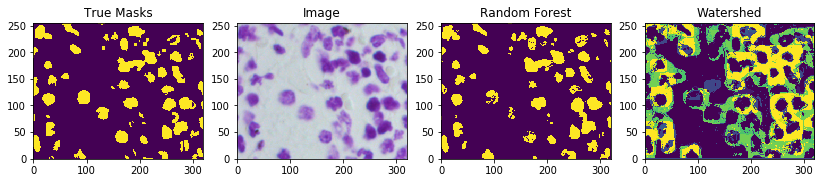

In [72]:
#173
for i in range(3,4):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i)

    (img_guess, markers, sure_bg, sure_fg, unknown, reduced_area) = watershed(img)

    intensity = grayscale(img)
    shap = intensity.shape
    intensity_raw = intensity.reshape(-1,1)
    #watershed_raw = img_guess[unknown==255].reshape(-1,1)
    watershed_raw = grayscale(img_guess).reshape(-1,1)
    fil = sobel(grayscale(img)).reshape(-1,1)

    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ch1,ch2,ch3 = cv2.split(img3)
    ch1 = ch1.reshape(-1,1)
    ch2 = ch2.reshape(-1,1)
    ch3 = ch3.reshape(-1,1)
    feature = np.concatenate((intensity_raw,watershed_raw, fil, ch1, ch2, ch3), axis = 1)

    yp = clf.predict(feature)
    y_real = sum(masks).reshape(-1,1)
    
    labels, nlabels, label_mask = separate_obj(grayscale(yp.reshape(shap[0], shap[1])))
    
    print('There are {} distinct nuclei'.format(nlabels))
    #print(len(masks))
    
fig, ax = plt.subplots(1,4, figsize = (14,14))

ax[0].imshow(sum(masks), origin='lower')
ax[0].set_title('True Masks')
ax[1].imshow(img, origin='lower')
ax[1].set_title('Image')
ax[2].imshow(grayscale(yp.reshape(shap[0], shap[1])), origin='lower')
ax[2].set_title('Random Forest')
ax[3].imshow(grayscale(img_guess), origin='lower')
ax[3].set_title('Watershed')
plt.show()

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
import skimage.segmentation
image = grayscale(img)
# Feel free to play around with the parameters to see how they impact the result
cv = skimage.segmentation.slic(img)
print(image.shape)
print(cv.shape)

print(np.sum(cv))

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv, cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

(256, 320)
(256, 320)
3957163


TypeError: Invalid dimensions for image data